# Decision Tree Practice

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn import tree

In [2]:
# Grabbing our data, then exploring it a bit
# Data source: https://www.kaggle.com/ronitf/heart-disease-uci
df = pd.read_csv("heart.csv")

# EDA

In [3]:
# in the interest of minimizing data leakage, won't look at .head()
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [4]:
X = df.drop(['target'], axis = 1)
y = df.target

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7, stratify=y)

In [6]:
y_train.value_counts(normalize=True)

1    0.545455
0    0.454545
Name: target, dtype: float64

In [7]:
y_test.value_counts(normalize=True)

1    0.540984
0    0.459016
Name: target, dtype: float64

In [8]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
170,56,1,2,130,256,1,0,142,1,0.6,1,1,1
124,39,0,2,94,199,0,1,179,0,0.0,2,0,2
134,41,0,1,126,306,0,1,163,0,0.0,2,0,2
28,65,0,2,140,417,1,0,157,0,0.8,2,1,2
208,49,1,2,120,188,0,1,139,0,2.0,1,3,3


In [9]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242 entries, 170 to 11
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       242 non-null    int64  
 1   sex       242 non-null    int64  
 2   cp        242 non-null    int64  
 3   trestbps  242 non-null    int64  
 4   chol      242 non-null    int64  
 5   fbs       242 non-null    int64  
 6   restecg   242 non-null    int64  
 7   thalach   242 non-null    int64  
 8   exang     242 non-null    int64  
 9   oldpeak   242 non-null    float64
 10  slope     242 non-null    int64  
 11  ca        242 non-null    int64  
 12  thal      242 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 26.5 KB


In [10]:
X_train.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.00000,242.000000,242.000000
mean,54.086777,0.685950,1.016529,131.677686,242.590909,0.173554,0.570248,149.785124,0.338843,1.016116,1.42562,0.780992,2.297521
std,9.217334,0.465098,1.054400,18.005861,47.020191,0.379510,0.528467,23.236724,0.474297,1.153503,0.61503,1.053334,0.633041
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,210.250000,0.000000,0.000000,134.500000,0.000000,0.000000,1.00000,0.000000,2.000000
50%,55.000000,1.000000,1.000000,130.000000,239.000000,0.000000,1.000000,152.000000,0.000000,0.650000,1.00000,0.000000,2.000000
75%,60.750000,1.000000,2.000000,140.000000,269.000000,0.000000,1.000000,169.000000,1.000000,1.600000,2.00000,1.000000,3.000000
max,77.000000,1.000000,3.000000,200.000000,417.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.00000,4.000000,3.000000


In [11]:
# How to figure out the categorical features? 
for column in X_train.columns:
    print(X_train[column].value_counts())

58    18
54    15
57    14
52    11
44    10
59     9
51     9
56     9
43     8
63     8
62     8
60     8
64     7
65     7
53     7
42     7
66     6
45     6
41     6
67     6
61     6
49     5
46     5
47     5
48     4
39     4
55     4
50     3
71     3
38     3
69     3
68     3
40     3
35     3
37     2
34     2
77     1
76     1
70     1
74     1
29     1
Name: age, dtype: int64
1    166
0     76
Name: sex, dtype: int64
0    112
2     76
1     34
3     20
Name: cp, dtype: int64
130    28
120    28
140    25
110    15
150    14
138    11
128    10
112     9
125     8
132     7
160     7
118     7
124     6
108     6
134     5
152     5
100     4
145     3
126     3
170     3
105     3
136     3
180     3
135     3
115     2
94      2
142     2
178     2
146     2
129     1
114     1
102     1
174     1
172     1
165     1
164     1
117     1
156     1
192     1
155     1
148     1
122     1
123     1
144     1
200     1
Name: trestbps, dtype: int64
234    6
204    6
197    5


# Modeling 

## Logistic Regression

### Preprocessing

What kind of preprocessing steps are there?
- Imputing
- Scaling
- Encoding

In [12]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer #need this for OHE
from sklearn.pipeline import make_pipeline, Pipeline

### Logistic Regression Model

In [13]:
X_train.columns.tolist()

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [14]:
from sklearn.linear_model import LogisticRegression
# Lets set up a Logistic Regression Pipeline

# First set up OHE
encoder = OneHotEncoder(drop='first')
catvar = ['restecg', 'slope', 'ca', 'thal']
# This gets me the column index in X_train
catvarid = [X_train.columns.tolist().index(column) for column in catvar]
catvarid


[6, 10, 11, 12]

In [15]:
pipe_lr = make_pipeline(SimpleImputer(),
                        ColumnTransformer([('encoder_name', encoder, catvarid)], 
                                          remainder='passthrough',
                                          sparse_threshold=0),
                        StandardScaler(),
                        LogisticRegression())

In [16]:
pipe_lr.steps

[('simpleimputer', SimpleImputer()),
 ('columntransformer',
  ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                    transformers=[('encoder_name', OneHotEncoder(drop='first'),
                                   [6, 10, 11, 12])])),
 ('standardscaler', StandardScaler()),
 ('logisticregression', LogisticRegression())]

In [17]:
pipe_lr.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('columntransformer',
                 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                                   transformers=[('encoder_name',
                                                  OneHotEncoder(drop='first'),
                                                  [6, 10, 11, 12])])),
                ('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [18]:
# use .predict_proba() here because we are doing Logreg here
train_pred = pipe_lr.predict_proba(X_train)
test_pred = pipe_lr.predict_proba(X_test)

In [19]:
train_pred[0]

array([0.73768601, 0.26231399])

In [20]:
# Lets fit the LogReg on our training and calculate our roc_auc_scores
# take the right score when comparing to y_train
train_score = roc_auc_score(y_train, train_pred[:,1])
test_score = roc_auc_score(y_test, test_pred[:,1])

In [21]:
print(f'Train ROC-AUC score: {train_score}')
print(f'Test ROC-AUC score: {test_score}')

Train ROC-AUC score: 0.9495179063360881
Test ROC-AUC score: 0.8831168831168832


How'd we do? 
Overfitting.

## Decision Trees

#### let's do a basic decision tree with just the default values

In [22]:
from sklearn.tree import DecisionTreeClassifier
# Fit the model and lets see the tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

[Text(1051.3536585365853, 1556.6727272727271, 'X[2] <= 0.5\ngini = 0.496\nsamples = 242\nvalue = [110, 132]'),
 Text(673.6829268292682, 1408.418181818182, 'X[11] <= 0.5\ngini = 0.366\nsamples = 112\nvalue = [85, 27]'),
 Text(408.29268292682923, 1260.1636363636362, 'X[8] <= 0.5\ngini = 0.5\nsamples = 49\nvalue = [24, 25]'),
 Text(204.14634146341461, 1111.909090909091, 'X[12] <= 2.5\ngini = 0.365\nsamples = 25\nvalue = [6, 19]'),
 Text(81.65853658536585, 963.6545454545454, 'X[7] <= 96.5\ngini = 0.198\nsamples = 18\nvalue = [2, 16]'),
 Text(40.829268292682926, 815.4, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(122.48780487804878, 815.4, 'X[4] <= 316.5\ngini = 0.111\nsamples = 17\nvalue = [1, 16]'),
 Text(81.65853658536585, 667.1454545454545, 'gini = 0.0\nsamples = 16\nvalue = [0, 16]'),
 Text(163.3170731707317, 667.1454545454545, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(326.6341463414634, 963.6545454545454, 'X[0] <= 53.5\ngini = 0.49\nsamples = 7\nvalue = [4, 3]'),
 Text(28

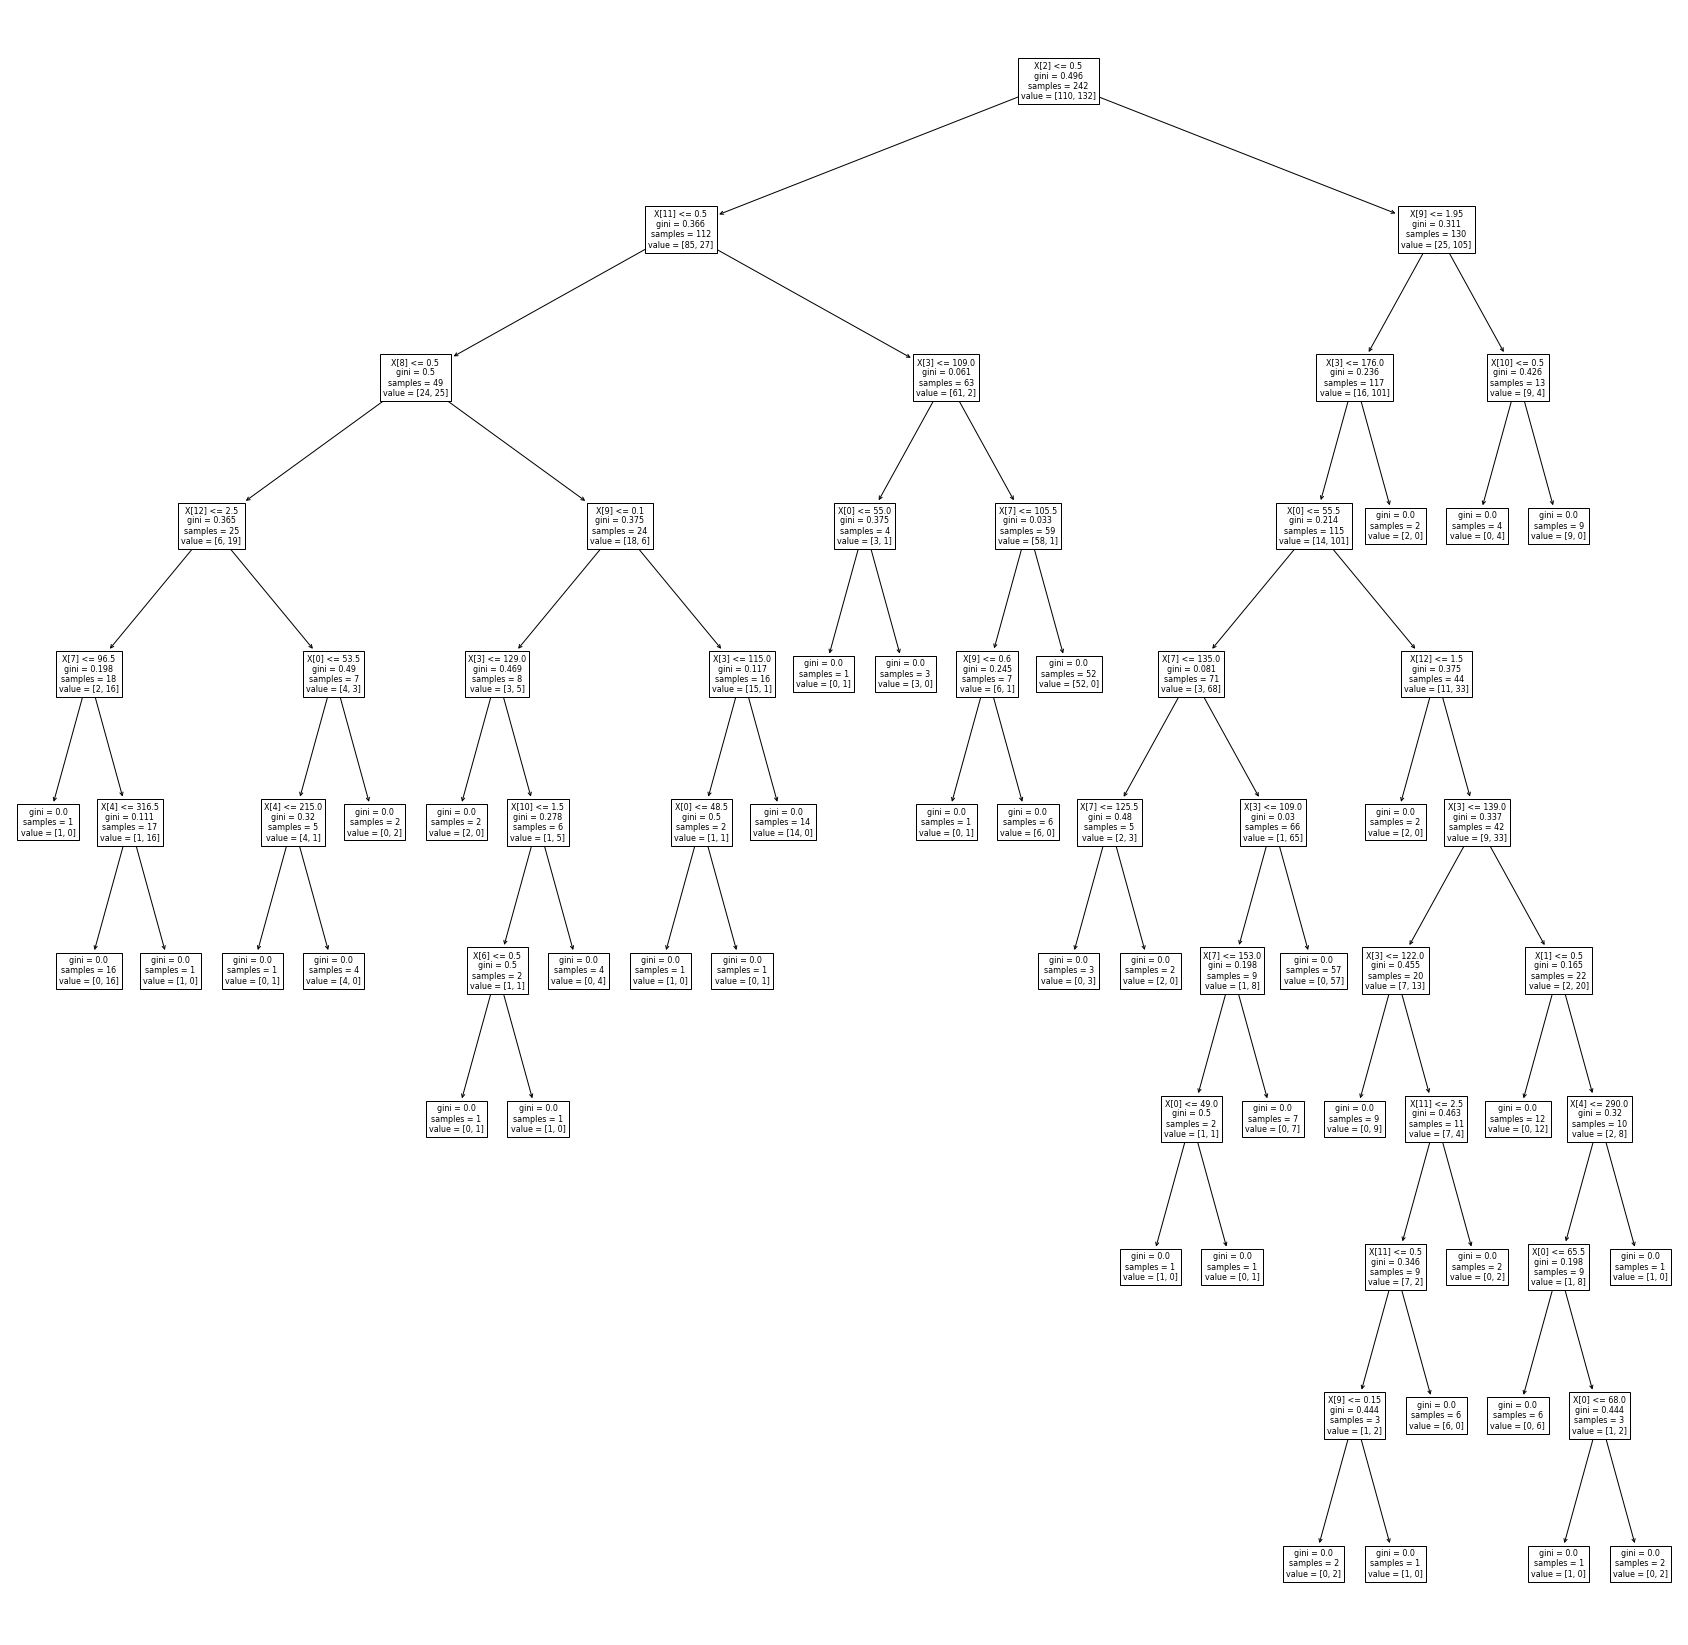

In [23]:
plt.figure(figsize=(30, 30))
tree.plot_tree(dt)
# Inspect: Gini = 0 in nodes. 

In [24]:
# Lets calculate the roc_auc_score
train_pred = dt.predict_proba(X_train)
test_pred = dt.predict_proba(X_test)

In [25]:
train_score = roc_auc_score(y_train, train_pred[:,1])
test_score = roc_auc_score(y_test, test_pred[:,1])
print(f'Train ROC-AUC score: {train_score}')
print(f'Test ROC-AUC score: {test_score}')

Train ROC-AUC score: 1.0
Test ROC-AUC score: 0.7056277056277056


How did we do? Way overfitting.

In [26]:
dt.get_depth()
# Way too deep

10

#### A simple decision tree with a single split

In [27]:
# lets set up the Decision Tree with a single split
dt_1 = DecisionTreeClassifier(max_depth= 1)
dt_1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1)

[Text(279.0, 407.70000000000005, 'X[2] <= 0.5\ngini = 0.496\nsamples = 242\nvalue = [110, 132]'),
 Text(139.5, 135.89999999999998, 'gini = 0.366\nsamples = 112\nvalue = [85, 27]'),
 Text(418.5, 135.89999999999998, 'gini = 0.311\nsamples = 130\nvalue = [25, 105]')]

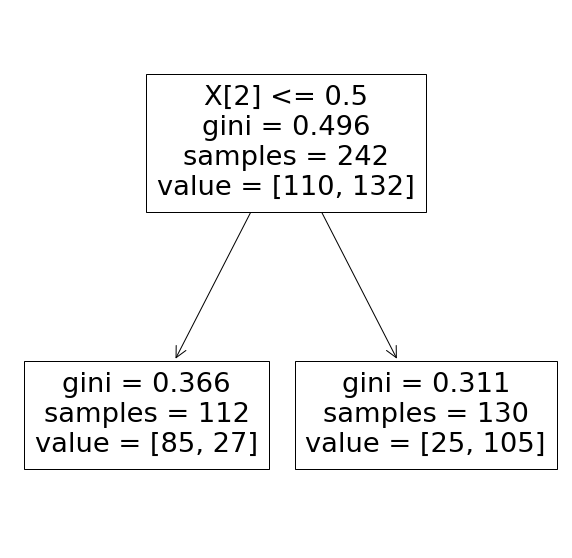

In [81]:
# Visualizing the single-split decision tree
plt.figure(figsize=(10,10))
tree.plot_tree(dt_1)

In [82]:
# Lets calculate the roc_auc_score
train_pred = dt_1.predict_proba(X_train)
test_pred = dt_1.predict_proba(X_test)

In [83]:
train_score = roc_auc_score(y_train, train_pred[:,1])
test_score = roc_auc_score(y_test, test_pred[:,1])
print(f'Train ROC-AUC score: {train_score}')
print(f'Test ROC-AUC score: {test_score}')

Train ROC-AUC score: 0.784090909090909
Test ROC-AUC score: 0.6574675324675324


#### Try something Random!

In [84]:
# Okay - time to change things!
# Replace None with relevant code
dt_2 = DecisionTreeClassifier(max_depth= 3, criterion='entropy', 
                              min_samples_split=10)

dt_2.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=10)

[Text(558.0, 951.3000000000001, 'X[2] <= 0.5\nentropy = 0.994\nsamples = 242\nvalue = [110, 132]'),
 Text(279.0, 679.5, 'X[11] <= 0.5\nentropy = 0.797\nsamples = 112\nvalue = [85, 27]'),
 Text(139.5, 407.70000000000005, 'X[8] <= 0.5\nentropy = 1.0\nsamples = 49\nvalue = [24, 25]'),
 Text(69.75, 135.89999999999998, 'entropy = 0.795\nsamples = 25\nvalue = [6, 19]'),
 Text(209.25, 135.89999999999998, 'entropy = 0.811\nsamples = 24\nvalue = [18, 6]'),
 Text(418.5, 407.70000000000005, 'X[9] <= 0.4\nentropy = 0.203\nsamples = 63\nvalue = [61, 2]'),
 Text(348.75, 135.89999999999998, 'entropy = 0.567\nsamples = 15\nvalue = [13, 2]'),
 Text(488.25, 135.89999999999998, 'entropy = 0.0\nsamples = 48\nvalue = [48, 0]'),
 Text(837.0, 679.5, 'X[9] <= 1.95\nentropy = 0.706\nsamples = 130\nvalue = [25, 105]'),
 Text(697.5, 407.70000000000005, 'X[0] <= 55.5\nentropy = 0.576\nsamples = 117\nvalue = [16, 101]'),
 Text(627.75, 135.89999999999998, 'entropy = 0.31\nsamples = 72\nvalue = [4, 68]'),
 Text(767.

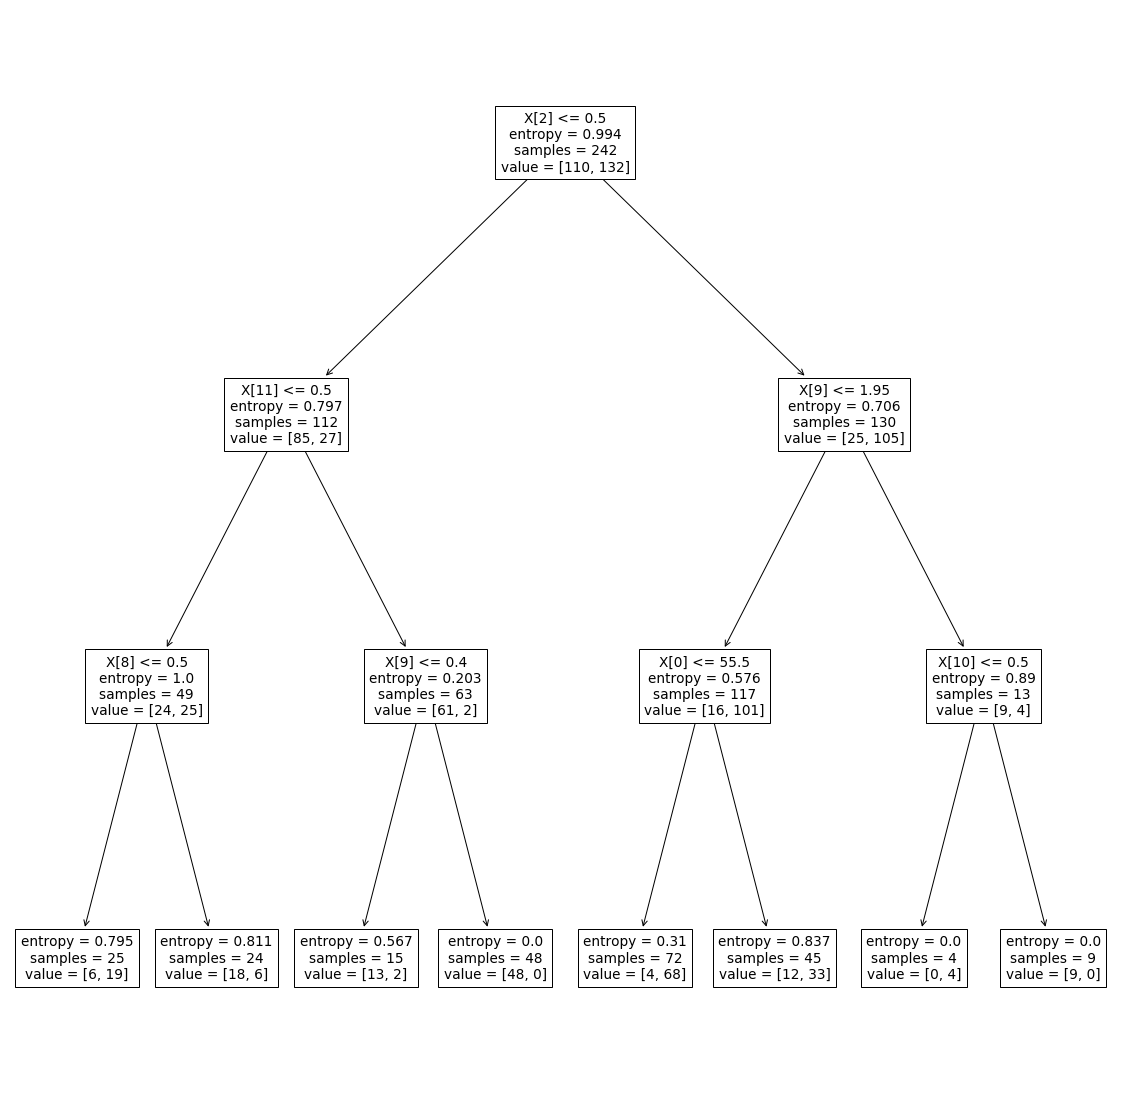

In [85]:
# Visualizing the decision tree
plt.figure(figsize=(20,20))
tree.plot_tree(dt_2)

In [86]:
# Lets calculate the roc_auc_score
train_preds = dt_2.predict_proba(X_train)
test_preds = dt_2.predict_proba(X_test)

train_score = roc_auc_score(y_train, train_preds[:,1])
test_score = roc_auc_score(y_test, test_preds[:,1])

print(f"Train ROC-AUC: {train_score}")
print(f"Test ROC-AUC: {test_score}")

Train ROC-AUC: 0.9258953168044077
Test ROC-AUC: 0.7662337662337663


## [GridSearch](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

Lets start by taking a look at the documentation

In [87]:
# arguments for the estimator(decision tree):
grid_params = {
    'max_depth':[3,4,5,6,7],
    'max_features':['sqrt', 'log2'],
    'class_weight':[None, 'balanced'],
    'criterion':['gini','entropy']
}

# the cv=4 param applies to the gridsearch, not dt
grid_search = GridSearchCV(dt, grid_params, cv=4, scoring='roc_auc')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7],
                         'max_features': ['sqrt', 'log2']},
             scoring='roc_auc')

In [90]:
grid_search.best_estimator_

DecisionTreeClassifier(class_weight='balanced', max_depth=4,
                       max_features='log2')

In [91]:
grid_search.best_estimator_.params

AttributeError: 'DecisionTreeClassifier' object has no attribute 'params'

In [49]:
# Generate the best estimator decision tree.
dt_grid = grid_search.best_estimator_

In [50]:
dt_grid.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=3, max_features='sqrt')

[Text(167.4, 190.26, 'X[12] <= 2.5\nentropy = 1.0\nsamples = 242\nvalue = [121.0, 121.0]'),
 Text(83.7, 135.9, 'X[11] <= 0.5\nentropy = 0.905\nsamples = 149\nvalue = [46.2, 98.083]'),
 Text(41.85, 81.53999999999999, 'X[7] <= 159.0\nentropy = 0.63\nsamples = 96\nvalue = [14.3, 76.083]'),
 Text(20.925, 27.180000000000007, 'entropy = 0.894\nsamples = 44\nvalue = [13.2, 29.333]'),
 Text(62.775000000000006, 27.180000000000007, 'entropy = 0.158\nsamples = 52\nvalue = [1.1, 46.75]'),
 Text(125.55000000000001, 81.53999999999999, 'X[2] <= 0.5\nentropy = 0.976\nsamples = 53\nvalue = [31.9, 22.0]'),
 Text(104.625, 27.180000000000007, 'entropy = 0.0\nsamples = 20\nvalue = [22.0, 0.0]'),
 Text(146.475, 27.180000000000007, 'entropy = 0.894\nsamples = 33\nvalue = [9.9, 22.0]'),
 Text(251.10000000000002, 135.9, 'X[8] <= 0.5\nentropy = 0.786\nsamples = 93\nvalue = [74.8, 22.917]'),
 Text(209.25, 81.53999999999999, 'X[11] <= 0.5\nentropy = 0.969\nsamples = 43\nvalue = [26.4, 17.417]'),
 Text(188.3250000

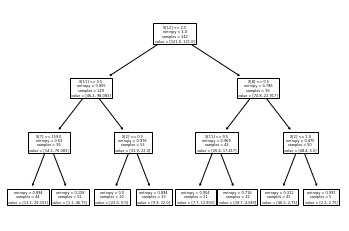

In [51]:
tree.plot_tree(dt_grid)

# Vizualizing all the models scores

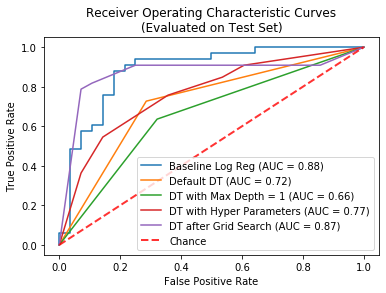

In [52]:
# Visualizing the ROCs for the models we've done
fig, ax = plt.subplots()
plot_roc_curve(pipe_lr, X_test, y_test, name="Baseline Log Reg", ax=ax)
plot_roc_curve(dt, X_test, y_test, name="Default DT", ax=ax)
plot_roc_curve(dt_1, X_test, y_test, name="DT with Max Depth = 1", ax=ax)
# plot_roc_curve(dt_maxdepth2, X_test, y_test, name="DT with Max Depth = 2", ax=ax)
plot_roc_curve(dt_2, X_test, y_test, name="DT with Hyper Parameters", ax=ax)
plot_roc_curve(dt_grid, X_test, y_test, name="DT after Grid Search", ax=ax)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)
plt.title("Receiver Operating Characteristic Curves\n(Evaluated on Test Set)")
ax.legend()
plt.show()

What can we learn from this visualization? Which is the best model - and how could you tell without looking at the scores?

- Baseline is still best - from both the visualization (closest to the '1' corner) and from the score

